In [4]:
# @title Input the prediction for the average daily rate in $
from ipywidgets import interact, widgets, interactive
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Function to display the data source and the current average rate
def display_info():
    print("Data source: Data scraped for competitors from AirBnb and Slowhop.")
    print(f"Current Average Rate: ${current_average_rate_eur}")

# Pricing data scraped from Airbnb and Slowhop, combined
price_data_usd = [
    180.6, 150.07, 95.546, 120.4, 189.2, 137.6, 129, 107.5,
    180.6, 227.9, 98.9, 55, 62, 140, 181, 139, 105, 164, 50, 146,
    133, 179, 244, 94, 151, 71, 91, 26, 206, 133, 139, 151, 151,
    178, 293, 247, 174, 181, 156, 226, 124, 128, 174, 75, 229, 350
]
price_series = pd.Series(price_data_usd)
current_average_rate = round(price_series.mean(), 2)

# Конвертация долларов в евро
usd_to_eur_exchange_rate = 1 / 1.07

# Конвертация данных о ценах в евро
price_data_eur = [usd * usd_to_eur_exchange_rate for usd in price_data_usd]

# Средняя цена в евро
current_average_rate_eur = round(sum(price_data_eur) / len(price_data_eur), 2)

# Function to create the histogram and vertical line
# Modified Function to create the histogram and vertical line considering principles from "Storytelling with Data"
def plot_histogram_with_rates(chosen_average_rate):
    clear_output(wait=True)

    display_info()  # Display data source and current average rate
    print(f"Chosen Average Rate: €{chosen_average_rate}")

    plt.figure(figsize=(10,6))
    plt.hist(price_data_eur, bins=14, alpha=0.5, color='#249CFF', label='Scraped Prices')

    # Current Average Rate line
    plt.axvline(current_average_rate_eur, color='k', linestyle='solid', linewidth=2, label=f'Current Average Rate: €{current_average_rate_eur}')

    # Chosen Average Rate line
    plt.axvline(chosen_average_rate, color='r', linestyle='dashed', linewidth=2, label=f'Chosen Average Rate: €{chosen_average_rate}')

    # Title and labels
    plt.title('Distribution of Prices with Current and Chosen Average Rates', fontsize=16, pad=20)
    plt.xlabel('Price in €', fontsize=14, labelpad=15)
    plt.ylabel('Frequency', fontsize=14, labelpad=15)

    # Eliminating top and right borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Use of text
    plt.text(current_average_rate_eur + 5, 5, f"Current Avg Rate: €{current_average_rate_eur}", color='k')
    plt.text(chosen_average_rate + 5, 4, f"Chosen Avg Rate: €{chosen_average_rate}", color='r')

    # Legend
    plt.legend(loc='upper right', fontsize=12)

    # Show plot
    plt.tight_layout()
    plt.show()


chosen_average_rate = current_average_rate_eur

# Create the slider widget for Chosen Average Rate
chosen_average_rate_slider = widgets.FloatSlider(
    value=current_average_rate_eur,
    min=50.0,
    max=350.0,
    step=5,
    description='Chosen Average Rate:',
)

# Function to update the stored chosen_average_rate whenever the slider value changes
def update_chosen_rate(change):
    global chosen_average_rate
    chosen_average_rate = change.new
    print(f"Updated chosen_average_rate: €{chosen_average_rate}")

# Attach the update function to the slider
chosen_average_rate_slider.observe(update_chosen_rate, names='value')

# Use interactive instead of interact
w = interactive(plot_histogram_with_rates, chosen_average_rate=chosen_average_rate_slider)

# Display the interactive plot
display(w)



interactive(children=(FloatSlider(value=141.47, description='Chosen Average Rate:', max=350.0, min=50.0, step=…

Updated chosen_average_rate: €140.0


In [5]:
# @title Total Initial Costs Breakdown in EUR with Sliders
from ipywidgets import interact, widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np

# Global variable to store initial expenses in EUR
initial_expenses_eur = 0.0

# Function to display total initial costs prominently in EUR
def display_total_initial_costs_eur(total_costs_eur):
    global initial_expenses_eur
    initial_expenses_eur = total_costs_eur
    print(f"\033[1mTotal Initial Costs: €{total_costs_eur:.2f}\033[0m")  # Using bold for emphasis

# Function to plot the charts for costs in EUR
def plot_charts_eur(house, furnishing, maintenance, buffer):
    clear_output(wait=True)

    # Calculate and display the total initial costs in EUR
    total_costs_eur = sum([house, furnishing, maintenance, buffer])
    display_total_initial_costs_eur(total_costs_eur)

    # Data for charts
    categories = ['House', 'Furnishing', 'Maintenance', 'Buffer']
    values_eur = [round(house), round(furnishing), round(maintenance), round(buffer)]
    colors = ['#FFC107', '#03A9F4', '#4CAF50', '#F44336']

    # Initialize the plots
    fig, axs = plt.subplots(1, 3, figsize=(16, 6))

    # Bar chart
    bars = axs[0].barh(categories, values_eur, color=colors)

    # Annotate the bars with values in EUR
    for i, val in enumerate(values_eur):
        axs[0].text(val + 1, i, f"€{val:,.0f}", va='center')

    # Hide x-axis and grid on bar chart
    axs[0].xaxis.set_visible(False)
    axs[0].grid(False)

    # Donut chart
    wedges, texts, autotexts = axs[1].pie(values_eur, labels=categories, autopct=lambda p: f"{p:.1f}%" if p > 0 else '', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.3), colors=colors)

    # Improve the text inside wedges
    for autotext in autotexts:
        autotext.set_fontsize(10)
        autotext.set_horizontalalignment('center')

    # Text-based chart for total costs in EUR
    axs[2].text(0.5, 0.5, f"Total Initial Costs:\n€{total_costs_eur:,.2f}", fontsize=24, ha='center', va='center')
    axs[2].axis('off')  # Hide axes

    # Show the plots
    plt.show()

# Create sliders for each category of initial expense in EUR
house_slider_eur = widgets.FloatSlider(value=70000, min=0, max=150000, step=1000, description='House (€):')
furnishing_slider_eur = widgets.FloatSlider(value=10000, min=0, max=50000, step=1000, description='Furnishing (€):')
maintenance_slider_eur = widgets.FloatSlider(value=10000, min=0, max=50000, step=1000, description='Maintenance (€):')
buffer_slider_eur = widgets.FloatSlider(value=10000, min=0, max=50000, step=1000, description='Buffer (€):')

# Link function to sliders and display them
interact(plot_charts_eur,
         house=house_slider_eur,
         furnishing=furnishing_slider_eur,
         maintenance=maintenance_slider_eur,
         buffer=buffer_slider_eur)


interactive(children=(FloatSlider(value=70000.0, description='House (€):', max=150000.0, step=1000.0), FloatSl…

<function __main__.plot_charts_eur(house, furnishing, maintenance, buffer)>

# Calculating seasonality data

In [6]:
import pandas as pd

# data scraped from AirBnb in České Budějovice region
occupancy_rates = [0.267, 0.357, 0.325, 0.487, 0.483, 0.594, 0.74, 0.708, 0.497, 0.562, 0.381, 0.493]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# combined dataframe
seasonal_occupancy = pd.DataFrame({'occupancy_rates': occupancy_rates, 'months': months})

original_daily_rates = [2.9, 3, 3.4, 2.9, 2.8, 2.6, 2.7, 2.75, 2.73, 2.2, 2.1, 3.4]
original_average_rate = 2.5


current_daily_rates = [original_rate * (current_average_rate / original_average_rate) for original_rate in original_daily_rates]

# Monthly revenue (current rates x days x occupancy)
monthly_revenue = [current_daily_rates[i] * 30 * seasonal_occupancy['occupancy_rates'][i] for i in range(12)]
# Monthly expenses
operating_expenses = 0.3
monthly_expenses = [operating_expenses * monthly_revenue[i] for i in range(12)]
# Monthly net operating income
monthly_net_operating_income = [monthly_revenue[i] - monthly_expenses[i] for i in range(12)]

seasonal_rates = pd.DataFrame({
    'daily_rates': current_daily_rates, 
    'months': months, 
    'monthly_revenue': monthly_revenue, 
    'monthly_expenses': monthly_expenses, 
    'monthly_net_operating_income': monthly_net_operating_income
})

# Округляем до целых чисел
seasonal_rates['daily_rates'] = seasonal_rates['daily_rates'].round(0)
seasonal_rates['monthly_revenue'] = seasonal_rates['monthly_revenue'].round(0)
seasonal_rates['monthly_expenses'] = seasonal_rates['monthly_expenses'].round(0)
seasonal_rates['monthly_net_operating_income'] = seasonal_rates['monthly_net_operating_income'].round(0)

seasonality_df = pd.merge(seasonal_occupancy, seasonal_rates, on='months')
# Set month as the index 
seasonality_df.set_index('months', inplace=True)

Yearly_net_operating_income = sum(seasonality_df['monthly_net_operating_income'])

yearly_ROI = round(Yearly_net_operating_income / initial_expenses_eur, 2)
breakeven_months = initial_expenses_eur / (Yearly_net_operating_income / 12)

average_occupancy = round(sum(seasonality_df['occupancy_rates']) / 12, 2)
average_rate = round(sum(seasonality_df['daily_rates']) / 12, 2)


In [7]:
# @title Monthly net
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


# Data
# data scraped from AirBnb in České Budějovice region
occupancy_rates = [0.267, 0.357, 0.325, 0.487, 0.483, 0.594, 0.74, 0.708, 0.497, 0.562, 0.381, 0.493]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# combined dataframe
seasonal_occupancy = pd.DataFrame({'occupancy_rates': occupancy_rates, 'months': months})

original_daily_rates = [2.9, 3, 3.4, 2.9, 2.8, 2.6, 2.7, 2.75, 2.73, 2.2, 2.1, 3.4]
original_average_rate = 2.5


current_daily_rates = [original_rate * (chosen_average_rate / original_average_rate) for original_rate in original_daily_rates]

# Monthly revenue (current rates x days x occupancy)
monthly_revenue = [current_daily_rates[i] * 30 * seasonal_occupancy['occupancy_rates'][i] for i in range(12)]
# Monthly expenses
operating_expenses = 0.3
monthly_expenses = [operating_expenses * monthly_revenue[i] for i in range(12)]
# Monthly net operating income
monthly_net_operating_income = [monthly_revenue[i] - monthly_expenses[i] for i in range(12)]

seasonal_rates = pd.DataFrame({
    'daily_rates': current_daily_rates,
    'months': months,
    'monthly_revenue': monthly_revenue,
    'monthly_expenses': monthly_expenses,
    'monthly_net_operating_income': monthly_net_operating_income
})

# Округляем до целых чисел
seasonal_rates['daily_rates'] = seasonal_rates['daily_rates'].round(0)
seasonal_rates['monthly_revenue'] = seasonal_rates['monthly_revenue'].round(0)
seasonal_rates['monthly_expenses'] = seasonal_rates['monthly_expenses'].round(0)
seasonal_rates['monthly_net_operating_income'] = seasonal_rates['monthly_net_operating_income'].round(0)

seasonality_df = pd.merge(seasonal_occupancy, seasonal_rates, on='months')
# Set month as the index
seasonality_df.set_index('months', inplace=True)

Yearly_net_operating_income = sum(seasonality_df['monthly_net_operating_income'])
initial_expenses = initial_expenses_eur
yearly_ROI = round(Yearly_net_operating_income / initial_expenses, 2)
breakeven_months = initial_expenses / (Yearly_net_operating_income / 12)

average_occupancy = round(sum(seasonality_df['occupancy_rates']) / 12, 2)
average_rate = round(sum(seasonality_df['daily_rates']) / 12, 2)

# Function to compute and visualize the values based on operating_expenses
def visualize_values(operating_expenses):
    # Adjusting the original rates
    current_daily_rates = [original_rate * (chosen_average_rate / original_average_rate) for original_rate in original_daily_rates]

    # Monthly Revenue, Expenses, and Net Operating Income
    monthly_revenue = [current_daily_rates[i] * 30 * seasonal_occupancy['occupancy_rates'][i] for i in range(12)]
    monthly_expenses = [operating_expenses * monthly_revenue[i] for i in range(12)]
    monthly_net_operating_income = [monthly_revenue[i] - monthly_expenses[i] for i in range(12)]

    # Results
    yearly_net_operating_income = round(sum(monthly_net_operating_income))
    yearly_ROI = yearly_net_operating_income / initial_expenses
    breakeven_months = round(initial_expenses / (yearly_net_operating_income / 12))
    breakeven_years = round(breakeven_months / 12)
    average_occupancy = sum(seasonal_occupancy['occupancy_rates']) / 12
    average_rate = sum(current_daily_rates) / 12

    # Printing results
    print(f"Operating Expenses (%): {operating_expenses * 100}")
    print(f"Average Occupancy: {round(average_occupancy, 2)}")
    print(f"Average Rate (€): {round(average_rate, 2)}")
    print(f"Yearly Revenue (€): {sum(monthly_revenue)}")
    print(f"Yearly Net Operating Income (€): {yearly_net_operating_income}")
    print(f"Yearly ROI (%): {round(yearly_ROI * 100, 2)}")
    print(f"Breakeven Time (months): {breakeven_months}")
    print(f"Breakeven Time (years): {breakeven_years}")
    


    # Set up the main figure and gridspec
    fig = plt.figure(figsize=(16, 6))
    gs = gridspec.GridSpec(1, 3, width_ratios=[6, 1, 1])  # Create 3 columns with specified ratios


    # Main bar chart for Monthly Net Operating Income and Expenses
    ax1 = fig.add_subplot(gs[0])
    ax1.bar(months, monthly_net_operating_income, color='#0081e7', label='Monthly Net Operating Income')
    ax1.bar(months, monthly_expenses, color='#ea8535', label='Monthly Expenses')
    ax1.set_xlabel("Months", fontsize=14)
    ax1.set_ylabel("Amount (€)", fontsize=14)
    ax1.set_title("Monthly Net Operating Income & Expenses", fontsize=16)
    ax1.legend(loc='upper right')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
    ax1.xaxis.grid(False)

    # Text-based chart for Yearly ROI %
    ax2 = fig.add_subplot(gs[1])
    ax2.text(0.5, 0.5, f"Yearly NOI:\n€{yearly_net_operating_income:,.0f}", fontsize=24, ha='center', va='center')
    ax2.axis('off')  # Hide axes

    # Text-based chart for Breakeven Time (years)
    ax3 = fig.add_subplot(gs[2])
    ax3.text(0.5, 0.5, f"Breakeven Time:\n{breakeven_years} years", fontsize=24, ha='center', va='center')
    ax3.axis('off')  # Hide axes

    plt.tight_layout()
    plt.show()

# Interactive Slider
widgets.interactive(visualize_values, operating_expenses=widgets.FloatSlider(value=0.3, min=0, max=1, step=0.01, description='Op. Expenses (%)'))


interactive(children=(FloatSlider(value=0.3, description='Op. Expenses (%)', max=1.0, step=0.01), Output()), _…

In [8]:
current_daily_rates

[164.1052,
 169.764,
 192.3992,
 164.1052,
 158.44639999999998,
 147.1288,
 152.78760000000003,
 155.617,
 154.48524,
 124.49360000000001,
 118.8348,
 192.3992]

In [9]:
# Импорт необходимых библиотек (Importing necessary libraries)
import plotly.graph_objects as go
import plotly.subplots as sp

# Создание сабплотов (Creating subplots)
fig = sp.make_subplots(rows=1, cols=2)

# График занятости (Occupancy Rate Plot)
fig.add_trace(
    go.Scatter(
        x=seasonality_df.index, 
        y=seasonality_df['occupancy_rates'], 
        mode='lines', 
        line=dict(color='magenta', width=3),
        name='Occupancy Rate',
        showlegend=False
    ),
    row=1, 
    col=1
)

# График дневных ставок (Daily Rates Plot)
fig.add_trace(
    go.Scatter(
        x=seasonality_df.index, 
        y=seasonality_df['daily_rates'], 
        mode='lines', 
        line=dict(color='cyan', width=3),
        name='Daily Rates',
        showlegend=False
    ),
    row=1, 
    col=2
)

# Настройка параметров графиков (Adjusting plot parameters)
fig.update_layout(
    title_font=dict(size=54, family="Open Sans, sans-serif"), # Изменяем шрифт на Open Sans
    font=dict(family="Open Sans, sans-serif"),
    plot_bgcolor='white', # Установка белого фона
    paper_bgcolor='white'
)

# Установка заголовка и других параметров для графика занятости (Setting title and other parameters for Occupancy Rate Plot)
fig.update_xaxes(title_text="Month", row=1, col=1)
fig.update_yaxes(title_text="Occupancy Rate (%)", tickformat='.0%', row=1, col=1)
fig.add_annotation(text=f"Average occupancy rate: {average_occupancy:.2%}", xref="paper", yref="paper", x=0.13, y=1.18, font=dict(size=19), showarrow=False)

# Установка заголовка и других параметров для графика дневных ставок (Setting title and other parameters for Daily Rates Plot)
fig.update_xaxes(title_text="Month", row=1, col=2)
fig.update_yaxes(title_text="Daily Rates (€)", tickprefix="€", row=1, col=2)
fig.add_annotation(text=f"Average daily rate: €{average_rate:.2f}", xref="paper", yref="paper", x=0.85, y=1.18, font=dict(size=19), showarrow=False)

fig.show()


In [10]:
# Импорт необходимых библиотек (Importing necessary libraries)
import plotly.graph_objects as go
import plotly.subplots as sp

# Создание сабплотов (Creating subplots)
fig = sp.make_subplots(rows=1, cols=2)

# График занятости (Occupancy Rate Plot)
fig.add_trace(
    go.Scatter(
        x=seasonality_df.index, 
        y=seasonality_df['occupancy_rates'], 
        mode='lines', 
        line=dict(color='magenta', width=4), # Increased line width
        name='Occupancy Rate',
        showlegend=False
    ),
    row=1, 
    col=1
)

# График дневных ставок (Daily Rates Plot)
fig.add_trace(
    go.Scatter(
        x=seasonality_df.index, 
        y=seasonality_df['daily_rates'], 
        mode='lines', 
        line=dict(color='cyan', width=4), # Increased line width
        name='Daily Rates',
        showlegend=False
    ),
    row=1, 
    col=2
)

# Настройка параметров графиков (Adjusting plot parameters)
fig.update_layout(
    title_font=dict(size=42, family="Open Sans, sans-serif"), # Font adjustment
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Установка заголовка и других параметров для графика занятости (Setting title and other parameters for Occupancy Rate Plot)
fig.update_xaxes(title_text="Month", row=1, col=1, title_font=dict(size=28), tickfont=dict(size=25))
fig.update_yaxes(title_text="Occupancy Rate (%)", tickformat='.0%', row=1, col=1, title_font=dict(size=28), tickfont=dict(size=25))
fig.add_annotation(text=f"Average occupancy rate: {average_occupancy:.2%}", xref="paper", yref="paper", x=0.11, y=1.18, font=dict(size=25), showarrow=False)

# Установка заголовка и других параметров для графика дневных ставок (Setting title and other parameters for Daily Rates Plot)
fig.update_xaxes(title_text="Month", row=1, col=2, title_font=dict(size=28), tickfont=dict(size=25))
fig.update_yaxes(title_text="Daily Rates ($)", tickprefix="$", row=1, col=2, title_font=dict(size=28), tickfont=dict(size=25))
fig.add_annotation(text=f"Average daily rate: ${average_rate:.2f}", xref="paper", yref="paper", x=0.87, y=1.18, font=dict(size=25), showarrow=False)

fig.show()


In [11]:
operating_expenses = 149.1/447.2
operating_expenses

0.33340787119856885

In [12]:
# Создание графика для Net Operating Income (Creating a plot for Net Operating Income)
fig = go.Figure()

# Adding the data
fig.add_trace(
    go.Scatter(
        x=seasonality_df.index, 
        y=seasonality_df['monthly_net_operating_income'], 
        mode='lines', 
        line=dict(color='blue', width=4),  # Increased line width for bolder appearance
        name='Net Operating Income',
    )
)

# Вычисление максимального значения (Calculating the max value)
max_value = seasonality_df['monthly_net_operating_income'].max()
max_value_month = seasonality_df['monthly_net_operating_income'].idxmax()

# Настройка параметров графика (Adjusting plot parameters)
fig.update_layout(
    title="Net Operating Income",
    title_font=dict(size=42, family="Open Sans, sans-serif"), # Increased font size for the title
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis_title="Month",
    xaxis_showgrid=False,
    xaxis_title_font=dict(size=28), # Increased font size for the x-axis title
    xaxis_tickfont=dict(size=25),  # Increased font size for the x-axis ticks
    yaxis_title="Amount ($)",
    yaxis_tickprefix="$",
    yaxis_showgrid=False,
    yaxis_title_font=dict(size=28), # Increased font size for the y-axis title
    yaxis_tickfont=dict(size=25),  # Increased font size for the y-axis ticks
    height=800
)

# Highlighting the max value
fig.add_annotation(
    text=f"Max: ${max_value:.2f}",
    x=max_value_month,
    y=max_value,
    showarrow=True,
    arrowhead=4,
    ax=0,
    ay=-40,
    font=dict(size=25)  # Increased font size for the annotation
)

fig.show()


In [13]:
# Сумма в долларах и стоимость за метр квадратный
amount_in_usd = 175.31
cost_per_sq_meter_in_usd = 0.45

# Текущий обменный курс
exchange_rate = 1.07

# Конвертация в евро
amount_in_eur = amount_in_usd / exchange_rate
cost_per_sq_meter_in_eur = cost_per_sq_meter_in_usd / exchange_rate

# Вывод отформатированных значений
print(f"{amount_in_usd} USD is equivalent to {amount_in_eur:.2f} EUR")
print(f"{cost_per_sq_meter_in_usd} USD per m² is equivalent to {cost_per_sq_meter_in_eur:.2f} EUR per m²")


175.31 USD is equivalent to 163.84 EUR
0.45 USD per m² is equivalent to 0.42 EUR per m²


C:\Users\Alex\AppData\Local\Temp\ipykernel_6560\4294189717.py:36: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



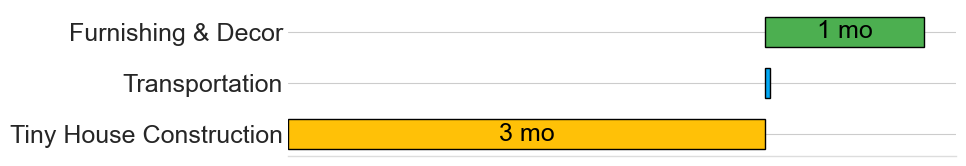

In [24]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define the start date of the project
start_date = datetime.now()

# Create a dictionary with the project stages and their durations in days
# Transportation will be indicated as 0 months on the chart
stages = {
    'Tiny House Construction': 3 * 30,  # 3 months
    'Transportation': 1,                 # 1 day, positioned between Construction and Furnishing
    'Furnishing & Decor': 1 * 30         # 1 month, starts after Transportation
}

# Function to add a stage to the Gantt chart
def add_stage(ax, name, start, duration, color, label=True):
    end = start + timedelta(days=duration)
    ax.barh(name, duration, left=start, color=color, edgecolor='black', height=0.6)
    if label:  # Only label the bar if label is True
        # Annotate the duration in months, excluding transportation which is just 1 day
        duration_months = duration // 30
        if duration_months > 0:
            ax.annotate(f'{duration_months} mo', 
                        (start + timedelta(days=duration/2), name), va='center', ha='center', color='black')

# Create figure and axis for the Gantt chart
fig, ax = plt.subplots(figsize=(10, 2))

# Apply the Open Sans font with a size of 18
plt.rcParams.update({
    'font.family': 'Open Sans',
    'font.size': 18
})

# Set up the aesthetics for the chart using a clean style
plt.style.use('seaborn-whitegrid')
colors = ['#FFC107', '#03A9F4', '#4CAF50']  # Blue for Construction, Orange for Furnishing

# Add stages to the Gantt chart
current_date = start_date
for i, (stage_name, duration) in enumerate(stages.items()):
    # Label only if it's not the Transportation phase
    label = stage_name != 'Transportation'
    add_stage(ax, stage_name, current_date, duration, colors[i % len(colors)], label=label)
    # Do not increment current_date for Transportation since it's just one day
    if stage_name != 'Transportation':
        current_date += timedelta(days=duration)

# Set limits and labels for axes
plt.xlabel('Timeline')
plt.ylabel('Project Stages')

# Simplify and clean the chart to align with 'Storytelling with Data' principles
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.xaxis.set_visible(False)
ax.get_yaxis().label.set_visible(False)

# Remove the title as per the instructions
# plt.title('Gantt Chart for Tiny House Construction and Setup')  # This line is now removed

# Tight layout for a clean look
plt.tight_layout()

# Display the Gantt chart
plt.show()


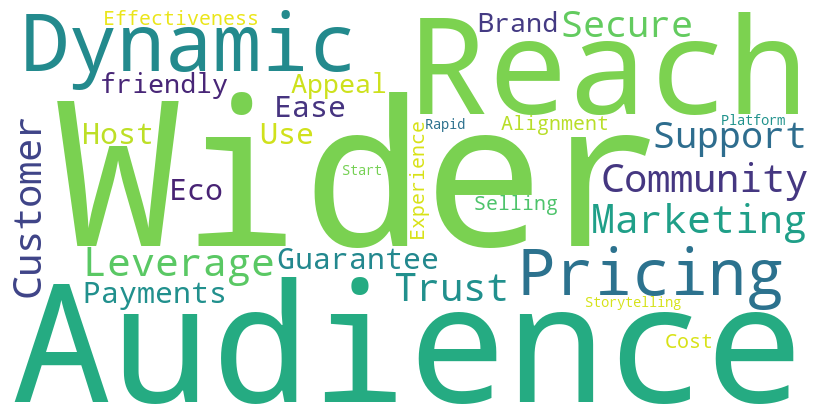

In [25]:
# Установка необходимых библиотек (если еще не установлены)
# !pip install wordcloud matplotlib numpy

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Определяем набор фраз, которые будут использоваться для создания облака слов
text = '''
Wider Audience Reach, Dynamic Pricing, Marketing Leverage, Community Trust, Customer Support, 
Secure Payments, Ease of Use, Host Guarantee, Eco-friendly Appeal, Brand Alignment, 
Cost-Effectiveness, Experience Selling, Storytelling Platform, Rapid Start
'''

# Создаем объект WordCloud
wordcloud = WordCloud(width = 800, height = 400, 
                      background_color ='white', 
                      colormap='viridis', 
                      min_font_size = 10).generate(text)

# Параметры отображения облака слов
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Отображаем готовое облако слов
plt.show()
